# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import itertools

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy




### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
  


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities, start=600):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    weather_response = requests.get(city_url)
    #turn result into json
    weather_data = weather_response.json()

    
    try:
        
        # Parse the JSON and retrieve data
        city_weather = weather_data['weather']

        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_data['coord']['lat']
        city_lng = weather_data['coord']['lon']
        city_max_temp = weather_data['main']['temp_max']
        city_humidity = weather_data['main']['humidity']
        city_clouds = weather_data['clouds']['all']
        city_wind = weather_data['wind']['speed']
        city_country = weather_data['sys']['country']
        city_date = weather_data['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    except:
        print("City not found. Skipping...")
        pass
 

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 2 | invercargill
Processing Record 1 of Set 2 | fuvahmulah
City not found. Skipping...
Processing Record 2 of Set 2 | vorgashor
Processing Record 3 of Set 2 | berlin
Processing Record 4 of Set 2 | adamstown
Processing Record 5 of Set 2 | namdrik
Processing Record 6 of Set 2 | grytviken
Processing Record 7 of Set 2 | nanao
Processing Record 8 of Set 2 | blackmans bay
Processing Record 9 of Set 2 | georgetown
Processing Record 10 of Set 2 | edinburgh of the seven seas
Processing Record 11 of Set 2 | saeby
Processing Record 12 of Set 2 | kapuskasing
Processing Record 13 of Set 2 | chonchi
Processing Record 14 of Set 2 | wamba
Processing Record 15 of Set 2 | albany
Processing Record 16 of Set 2 | lihue
Processing Record 17 of Set 2 | bredasdorp
Processing Record 18 of Set 2 | petropavlovsk-kamchatsky
Processing Record 19 of Set 2 | takoradi
Processing Record 20 of Set 2 | fort bragg
Processing Record 21 

Processing Record 40 of Set 5 | alice springs
Processing Record 41 of Set 5 | sabha
Processing Record 42 of Set 5 | mount isa
Processing Record 43 of Set 5 | nar'yan-mar
Processing Record 44 of Set 5 | alibag
Processing Record 45 of Set 5 | sisimiut
Processing Record 46 of Set 5 | ola
Processing Record 47 of Set 5 | al qusayr
Processing Record 48 of Set 5 | bestobe
Processing Record 49 of Set 5 | plastun
Processing Record 0 of Set 6 | parabel'
Processing Record 1 of Set 6 | ketchikan
Processing Record 2 of Set 6 | ocean city
Processing Record 3 of Set 6 | opatija
Processing Record 4 of Set 6 | kudahuvadhoo
Processing Record 5 of Set 6 | isle of lewis
City not found. Skipping...
Processing Record 6 of Set 6 | manismata
Processing Record 7 of Set 6 | rongelap
Processing Record 8 of Set 6 | stiens
Processing Record 9 of Set 6 | mar del plata
Processing Record 10 of Set 6 | aioun
Processing Record 11 of Set 6 | port alfred
Processing Record 12 of Set 6 | brisas de zicatela
Processing Recor

Processing Record 32 of Set 9 | urengoy
Processing Record 33 of Set 9 | wau
Processing Record 34 of Set 9 | colonia
Processing Record 35 of Set 9 | pangai
Processing Record 36 of Set 9 | okhotsk
Processing Record 37 of Set 9 | rawah
Processing Record 38 of Set 9 | pinhao
Processing Record 39 of Set 9 | sao gabriel da cachoeira
Processing Record 40 of Set 9 | mahina
Processing Record 41 of Set 9 | bargara
City not found. Skipping...
Processing Record 42 of Set 9 | dhulia
Processing Record 43 of Set 9 | mejit
Processing Record 44 of Set 9 | steinbach
Processing Record 45 of Set 9 | tefe
Processing Record 46 of Set 9 | santa luzia
Processing Record 47 of Set 9 | anse la raye
Processing Record 48 of Set 9 | cedar city
Processing Record 49 of Set 9 | mari-turek
Processing Record 0 of Set 10 | karratha
Processing Record 1 of Set 10 | qina
Processing Record 2 of Set 10 | kavieng
Processing Record 3 of Set 10 | castillos
Processing Record 4 of Set 10 | mwatate
Processing Record 5 of Set 10 | m

Processing Record 21 of Set 13 | sassnitz
Processing Record 22 of Set 13 | kataragama
City not found. Skipping...
Processing Record 23 of Set 13 | taltal
Processing Record 24 of Set 13 | serenje
Processing Record 25 of Set 13 | malvan
Processing Record 26 of Set 13 | bubaque
Processing Record 27 of Set 13 | dubbo
Processing Record 28 of Set 13 | castlebar
Processing Record 29 of Set 13 | midvagur
Processing Record 30 of Set 13 | turbat
Processing Record 31 of Set 13 | gisborne
Processing Record 32 of Set 13 | tromso
Processing Record 33 of Set 13 | big stone gap
Processing Record 34 of Set 13 | lospalos
Processing Record 35 of Set 13 | dadonghai
City not found. Skipping...
Processing Record 36 of Set 13 | nagqu
Processing Record 37 of Set 13 | lautoka
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,58.06,67,99,13.35,NZ,1685051679
1,vorgashor,67.5833,63.9500,56.39,75,95,10.22,RU,1685051970
2,berlin,52.5244,13.4105,57.22,78,0,6.91,DE,1685051740
3,adamstown,-25.0660,-130.1015,74.10,68,53,6.35,PN,1685051971
4,namdrik,5.5994,168.1028,83.59,76,99,16.55,MH,1685051971


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,58.06,67,99,13.35,NZ,1685051679
1,vorgashor,67.5833,63.9500,56.39,75,95,10.22,RU,1685051970
2,berlin,52.5244,13.4105,57.22,78,0,6.91,DE,1685051740
3,adamstown,-25.0660,-130.1015,74.10,68,53,6.35,PN,1685051971
4,namdrik,5.5994,168.1028,83.59,76,99,16.55,MH,1685051971


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

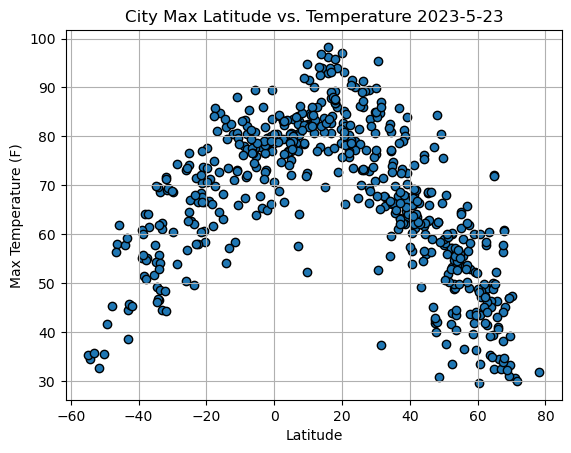

In [11]:
# Build scatter plot for latitude vs. temperature
temp_by_lat = city_data_df[["Lat", "Max Temp"]].copy()
plt.scatter(temp_by_lat['Lat'], temp_by_lat['Max Temp'], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

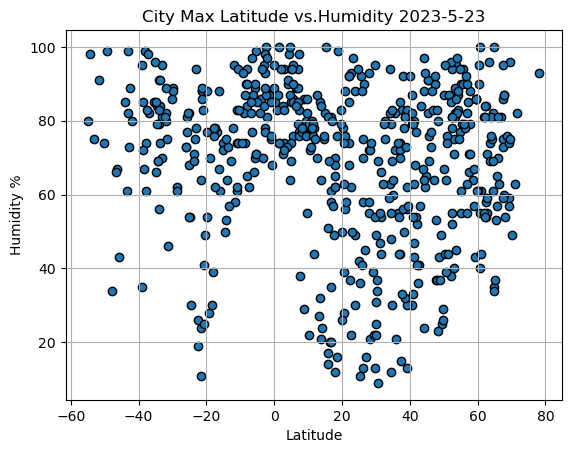

In [12]:
# Build the scatter plots for latitude vs. humidity
humidity_by_lat = city_data_df[["Lat", "Humidity"]].copy()
plt.scatter(humidity_by_lat['Lat'], humidity_by_lat["Humidity"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs.Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

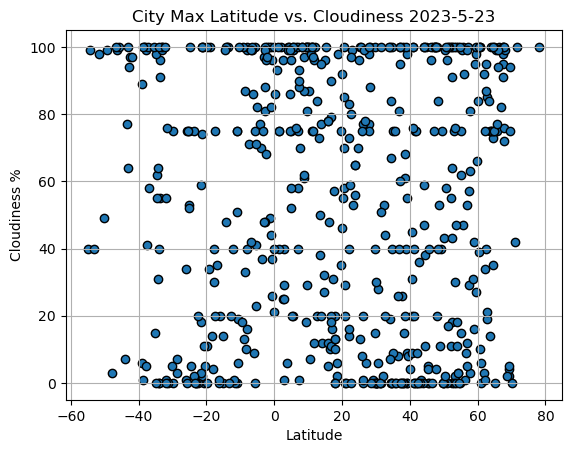

In [13]:
# Build the scatter plots for latitude vs. cloudiness
clouds_by_lat = city_data_df[["Lat", "Cloudiness"]].copy()
plt.scatter(clouds_by_lat['Lat'], clouds_by_lat["Cloudiness"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

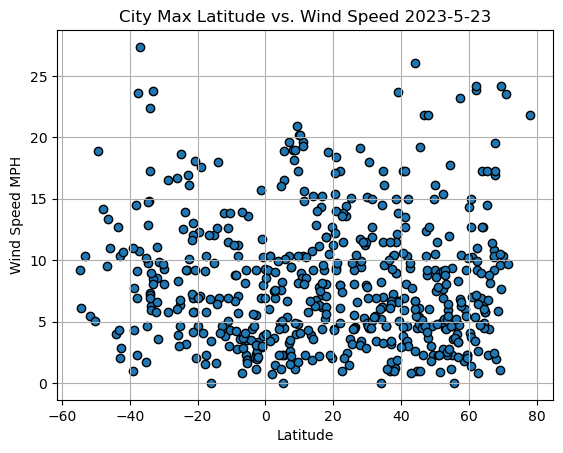

In [14]:
# Build the scatter plots for latitude vs. wind speed
wind_by_lat = city_data_df[["Lat", "Wind Speed"]].copy()
plt.scatter(wind_by_lat['Lat'], wind_by_lat["Wind Speed"], marker="o",  edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed MPH')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vorgashor,67.5833,63.9500,56.39,75,95,10.22,RU,1685051970
2,berlin,52.5244,13.4105,57.22,78,0,6.91,DE,1685051740
4,namdrik,5.5994,168.1028,83.59,76,99,16.55,MH,1685051971
6,nanao,37.0500,136.9667,63.28,74,100,3.20,JP,1685051972
8,georgetown,5.4112,100.3354,80.55,86,20,2.30,MY,1685051657


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,58.06,67,99,13.35,NZ,1685051679
3,adamstown,-25.0660,-130.1015,74.10,68,53,6.35,PN,1685051971
5,grytviken,-54.2811,-36.5092,34.41,98,99,6.11,GS,1685051971
7,blackmans bay,-43.0167,147.3167,44.53,82,64,10.31,AU,1685051972
9,edinburgh of the seven seas,-37.0676,-12.3116,61.45,82,58,27.36,SH,1685051625


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6576480030254845


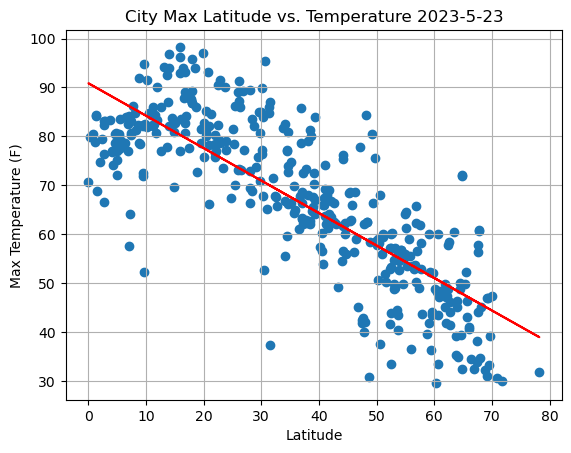

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15, color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()


The r-squared is: 0.6316962639578385


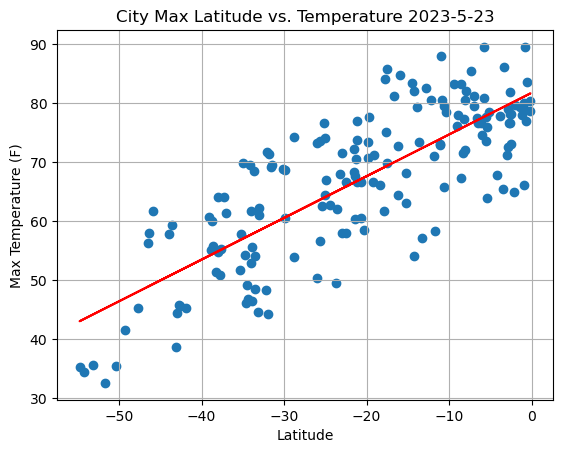

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
There is a clear and strong relationship between latitude and max temperature. As you go from the poles, towards the equator, the max temperature rises. In both the northern and southern hemispheres, this is a strong correlation

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 7.143979541721608e-05


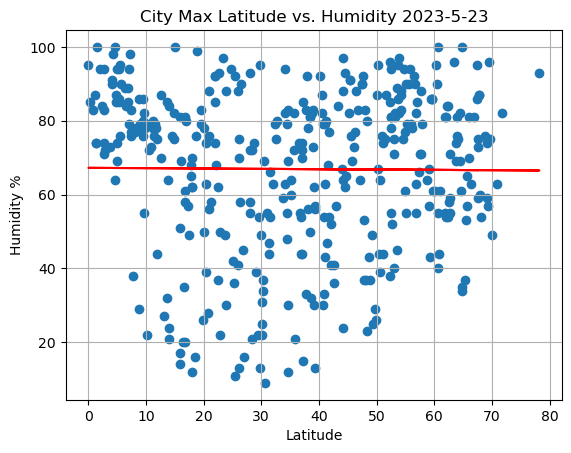

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.010466796720753175


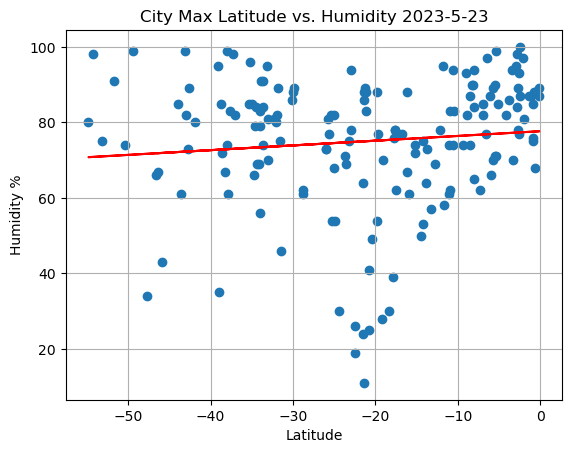

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
Any relationship between latitude and humidity is small. As you get closer to the equator, the humidity rises. However, at .01 r-squared, the correlation is not strong. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.002968922928301667


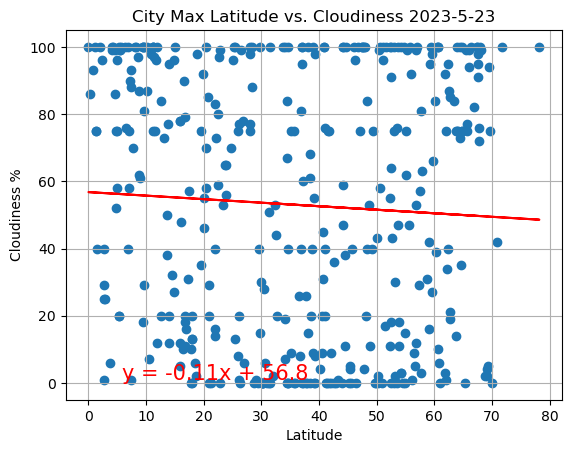

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.00036796782959491487


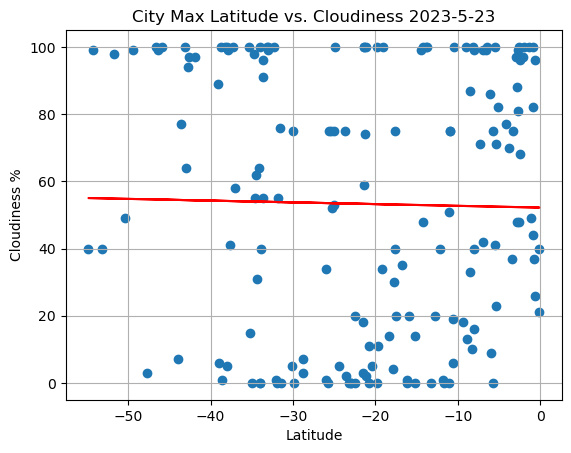

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
There does not seem to be a relationship between latitude and cloudines. From the data, it seems as though cloudiness is just as prevalent towards the poles as it is at the equator. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 1.780028909979009e-05


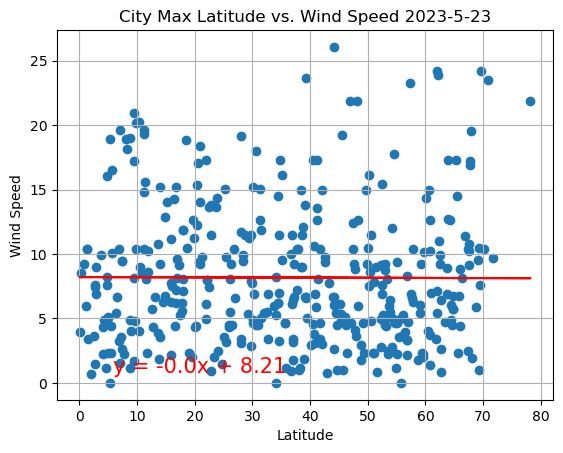

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.08436117477732696


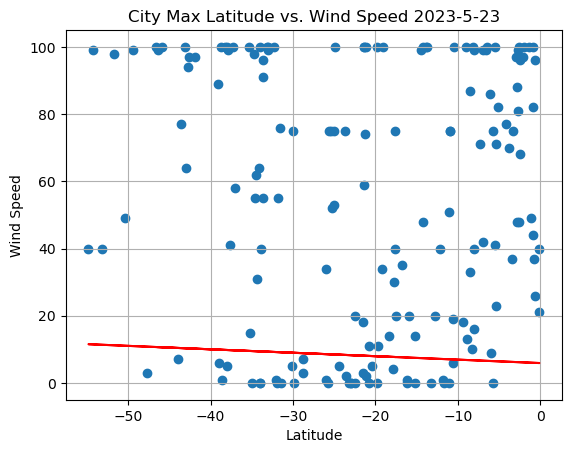

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed 2023-5-23")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:**
There may be a correlation between latitude and wind speed. While the dots seem spread out on the chart, it appears as though the further you go from the equator the higher the wind speed. With an r-squared of .08, this could be a meaningful correlation. 